# Imports

In [128]:
import requests
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pytz
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# API Information

In [129]:
USERNAME ='OOIAPI-9O3OUL6L1FJHJL'
TOKEN = 'DI74QJTYAXB'
DATA_API_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

# URL

In [130]:
data_request_url = ['https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE02SHSM/SBD11/06-METBKA000/telemetered/metbk_a_dcl_instrument?beginDT=2019-01-01T18:31:09.971Z&endDT=2020-01-01T18:31:09.971Z&limit=1000',
                    'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE04OSSM/SBD11/06-METBKA000/telemetered/metbk_a_dcl_instrument?beginDT=2019-01-01T18:31:09.971Z&endDT=2020-01-01T18:31:09.971Z&limit=1000']

# Timezone Converter

In [131]:
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()


def ntp_seconds_to_datetime(ntp_seconds):
    timestamp = datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)
    utc_timezone = pytz.timezone("UTC")
    pst_timezone = pytz.timezone("US/Pacific")
    time = utc_timezone.localize(timestamp).astimezone(pst_timezone)
    return time

# Monthly Average Function

In [132]:
def monthly_avg(t,v,p):
    
    Jan_v = []
    Feb_v = []
    Mar_v = []
    Apr_v = []
    May_v = []
    Jun_v = []
    Jul_v = []
    Aug_v = []
    Sep_v = []
    Oct_v = []
    Nov_v = []
    Dec_v = []

    Jan_p = []
    Feb_p = []
    Mar_p = []
    Apr_p = []
    May_p = []
    Jun_p = []
    Jul_p = []
    Aug_p = []
    Sep_p = []
    Oct_p = []
    Nov_p = []
    Dec_p = []

    avg_v = []
    avg_p = []
    
    Months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    
    for i in range(len(t)):
        if i <= int(round((len(t)/12),0)):
            Jan_v.append(v[i])
            Jan_p.append(p[i])
        elif i > int(round((len(t)/12),0)) and i <= 2*int(round((len(t)/12),0)):
            Feb_v.append(v[i])
            Feb_p.append(p[i])
        elif i > 2*int(round((len(t)/12),0)) and i <= 3*int(round((len(t)/12),0)):
            Mar_v.append(v[i])
            Mar_p.append(p[i])
        elif i > 3*int(round((len(t)/12),0)) and i <= 4*int(round((len(t)/12),0)):
            Apr_v.append(v[i])
            Apr_p.append(p[i])
        elif i > 4*int(round((len(t)/12),0)) and i <= 5*int(round((len(t)/12),0)):
            May_v.append(v[i])
            May_p.append(p[i])
        elif i > 5*int(round((len(t)/12),0)) and i <= 6*int(round((len(t)/12),0)):
            Jun_v.append(v[i])
            Jun_p.append(p[i])
        elif i > 6*int(round((len(t)/12),0)) and i <= 7*int(round((len(t)/12),0)):
            Jul_v.append(v[i])
            Jul_p.append(p[i])
        elif i > 7*int(round((len(t)/12),0)) and i <= 8*int(round((len(t)/12),0)):
            Aug_v.append(v[i])
            Aug_p.append(p[i])
        elif i > 8*int(round((len(t)/12),0)) and i <= 9*int(round((len(t)/12),0)):
            Sep_v.append(v[i])
            Sep_p.append(p[i])
        elif i > 9*int(round((len(t)/12),0)) and i <= 10*int(round((len(t)/12),0)):
            Oct_v.append(v[i])
            Oct_p.append(p[i])
        elif i > 10*int(round((len(t)/12),0)) and i <= 11*int(round((len(t)/12),0)):
            Nov_v.append(v[i])
            Nov_p.append(p[i])
        elif i > 11*int(round((len(t)/12),0)):
            Dec_v.append(v[i])
            Dec_p.append(p[i])
        
    avg_v.append(np.mean(Dec_v))
    avg_p.append(np.mean(Dec_p))
    avg_v.append(np.mean(Nov_v))
    avg_p.append(np.mean(Nov_p))
    avg_v.append(np.mean(Oct_v))
    avg_p.append(np.mean(Oct_p))
    avg_v.append(np.mean(Sep_v))
    avg_p.append(np.mean(Sep_p))
    avg_v.append(np.mean(Aug_v))
    avg_p.append(np.mean(Aug_p))
    avg_v.append(np.mean(Jul_v))
    avg_p.append(np.mean(Jul_p))
    avg_v.append(np.mean(Jun_v))
    avg_p.append(np.mean(Jun_p))
    avg_v.append(np.mean(May_v))
    avg_p.append(np.mean(May_p))
    avg_v.append(np.mean(Apr_v))
    avg_p.append(np.mean(Apr_p))
    avg_v.append(np.mean(Mar_v))
    avg_p.append(np.mean(Mar_p))
    avg_v.append(np.mean(Feb_v))
    avg_p.append(np.mean(Feb_p))
    avg_v.append(np.mean(Jan_v))
    avg_p.append(np.mean(Jan_p))

    return avg_v,avg_p,Months

# Plotting Wind Speed and Rain Rate

In [133]:
t_OSSM = []
p_OSSM = []
v_OSSM = []

t_OOSM = []
p_OOSM = []
v_OOSM = []

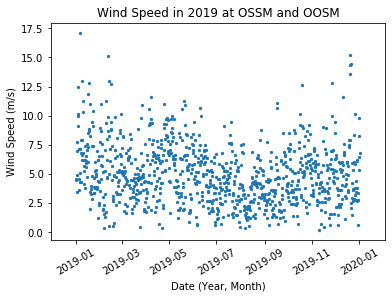

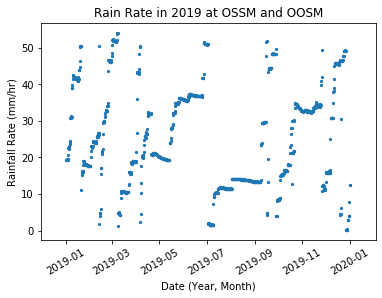

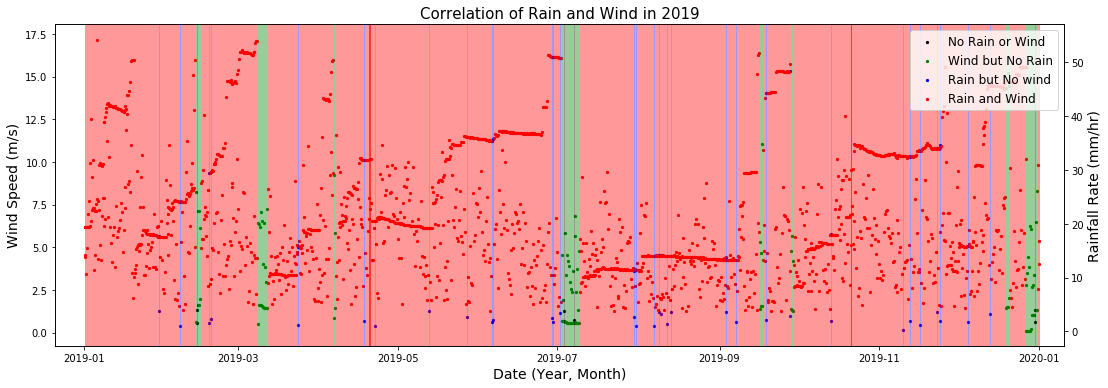

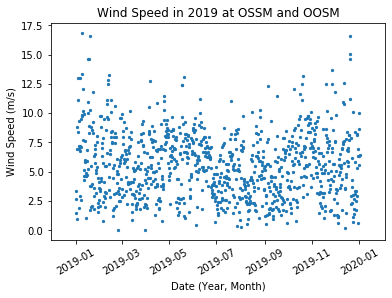

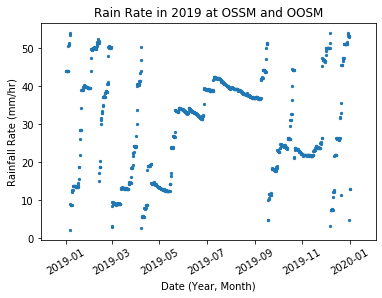

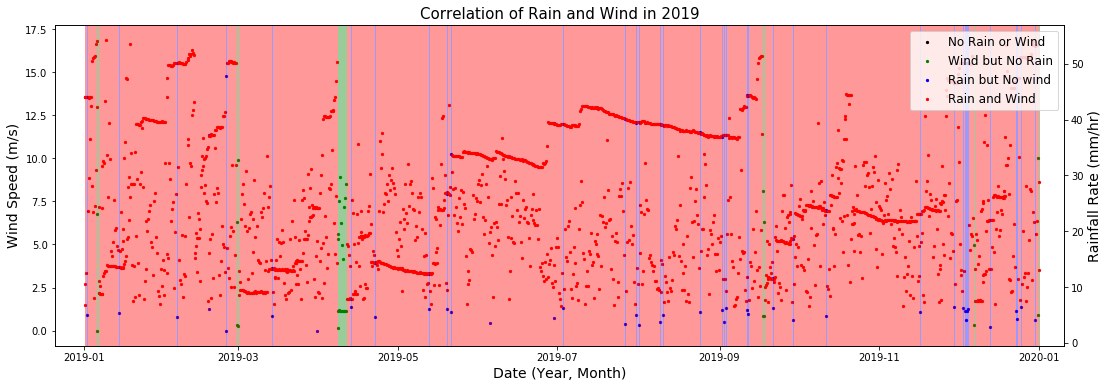

In [134]:
for i in range(len(data_request_url)):
    r = requests.get(data_request_url[i], auth=(USERNAME, TOKEN))
    data = r.json()
    t = []
    p = []
    v = []
    
    for j in range(len(data)):
        t.append(ntp_seconds_to_datetime(data[j]['time']))
        p.append(data[j]['precipitation'])
        wind_d = np.sqrt((np.square(data[j]['northward_wind_velocity']))+(np.square(data[j]['eastward_wind_velocity'])))
        v.append(wind_d)
        if i == 0:
            t_OSSM.append(ntp_seconds_to_datetime(data[j]['time']))
            p_OSSM.append(data[j]['precipitation'])
            v_OSSM.append(wind_d)
        elif i == 1:
            t_OOSM.append(ntp_seconds_to_datetime(data[j]['time']))
            p_OOSM.append(data[j]['precipitation'])
            v_OOSM.append(wind_d)
            
    from numpy import *
    v = np.asarray(v)
    NaNs = isnan(v)
    v[NaNs] = 0
    
    #No rain or wind
    t1 = []
    p1 = []
    v1 = []
    
    #Wind but no rain
    t2 = []
    p2 = []
    v2 = []
    
    #Rain but no wind
    t3 = []
    p3 = []
    v3 = []
    
    #Rain and wind
    t4 = []
    p4 = []
    v4 = []
    
    plt.scatter(t,v,s=5)
    plt.xticks(rotation=30)
    plt.xlabel('Date (Year, Month)')
    plt.ylabel('Wind Speed (m/s)')
    plt.title('Wind Speed in 2019 at OSSM and OOSM')
    plt.show()
    
    plt.scatter(t,p,s=5)
    plt.xticks(rotation=30)
    plt.xlabel('Date (Year, Month)')
    plt.ylabel('Rainfall Rate (mm/hr)')
    plt.title('Rain Rate in 2019 at OSSM and OOSM')
    plt.show()
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    
    for i in range(len(t)-1):
        if v[i]/np.mean(v) < .25 and p[i]/np.mean(p) < .25:
            t1.append(t[i])
            p1.append(p[i])
            v1.append(v[i])
            plt.axvspan(t[i], t[i+1], facecolor='black', alpha=.4)
        elif v[i]/np.mean(v) >= .25 and p[i]/np.mean(p) < .25:
            t2.append(t[i])
            p2.append(p[i])
            v2.append(v[i])
            plt.axvspan(t[i], t[i+1], facecolor='green', alpha=.4)
        elif v[i]/np.mean(v) < .25 and p[i]/np.mean(p) >= .25:
            t3.append(t[i])
            p3.append(p[i])
            v3.append(v[i])
            plt.axvspan(t[i], t[i+1], facecolor='blue', alpha=.4)
        elif v[i]/np.mean(v) >= .25 and p[i]/np.mean(p) >= .25:
            t4.append(t[i])
            p4.append(p[i])
            v4.append(v[i])
            plt.axvspan(t[i], t[i+1], facecolor='red', alpha=.4)
    
    ax1.scatter(t1,v1,s=5,color = 'black')
    ax2.scatter(t1,p1,s=5,color = 'black',label = 'No Rain or Wind')
    ax1.scatter(t2,v2,s=5,color = 'green')
    ax2.scatter(t2,p2,s=5,color = 'green',label = 'Wind but No Rain')
    ax1.scatter(t3,v3,s=5,color = 'blue')
    ax2.scatter(t3,p3,s=5,color = 'blue',label = 'Rain but No wind')
    ax1.scatter(t4,v4,s=5,color = 'red')
    ax2.scatter(t4,p4,s=5,color = 'red',label = 'Rain and Wind')
    ax1.set_xlim([datetime.date(2018, 12, 21),datetime.date(2020, 1, 11)])
    plt.legend(loc='upper right', fontsize=12)
    plt.gcf().set_size_inches(15,5)
    plt.xticks(rotation=30)
    plt.tight_layout()
    ax1.set_xlabel('Date (Year, Month)', fontsize=14)
    ax1.set_ylabel('Wind Speed (m/s)', fontsize=14)
    ax2.set_ylabel('Rainfall Rate (mm/hr)', fontsize=14)
    plt.title('Correlation of Rain and Wind in 2019', fontsize=15)
    plt.show()

# Cross Correlation and Lag for Wind Speed

Max Correlation is at Lag 0
Lag in Days: 0
Max Correlation is 0.738991088683109


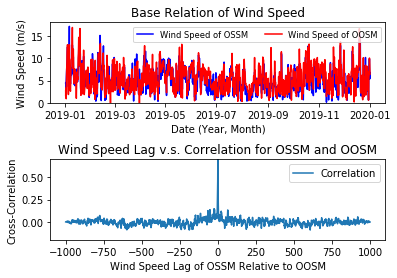

In [135]:
v_OSSM = np.asarray(v_OSSM)
NaNs = isnan(v_OSSM)
v_OSSM[NaNs] = 0

v_OOSM = np.asarray(v_OOSM)
NaNs = isnan(v_OOSM)
v_OOSM[NaNs] = 0

y1 = v_OSSM
y2 = v_OOSM

x = t

lags = np.arange(-len(y1) + 1, len(y1))
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (len(y1) * y1.std() * y2.std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)

ax = axs[0]
ax.plot(x, y1, 'b', label='Wind Speed of OSSM')
ax.plot(x, y2, 'r', label='Wind Speed of OOSM')
ax.set_ylim(0, 18)
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title('Base Relation of Wind Speed')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_xlabel('Date (Year, Month)')


ax = axs[1]
ax.plot(lags, ccor, label='Correlation')
ax.legend()
ax.set_ylim(-.2, .7)
ax.set_ylabel('Cross-Correlation')
ax.set_xlabel('Wind Speed Lag of OSSM Relative to OOSM')
ax.set_title('Wind Speed Lag v.s. Correlation for OSSM and OOSM')

plt.subplots_adjust(hspace=.7)

maxlag = lags[np.argmax(ccor)]
print("Max Correlation is at Lag %d" % maxlag)
days = (maxlag/len(t))*365
print('Lag in Days: %d' % days)
maxccor = np.max(ccor)
print('Max Correlation is ' + str(maxccor))

# Cross Correlation and Lag for Rain Rate

Max Correlation is at Lag 340
Lag in Days: 123
Max Correlation is 0.3465862996383567


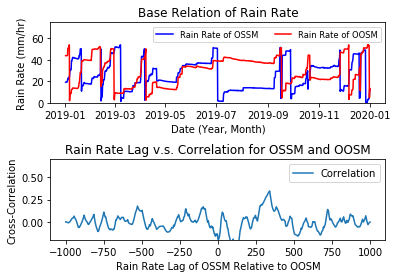

In [136]:
p_OSSM = np.asarray(p_OSSM)
NaNs = isnan(p_OSSM)
p_OSSM[NaNs] = 0

p_OOSM = np.asarray(p_OOSM)
NaNs = isnan(p_OOSM)
p_OOSM[NaNs] = 0

y1 = p_OSSM
y2 = p_OOSM

x = t

lags = np.arange(-len(y1) + 1, len(y1))
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (len(y1) * y1.std() * y2.std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)

ax = axs[0]
ax.plot(x, y1, 'b', label='Rain Rate of OSSM')
ax.plot(x, y2, 'r', label='Rain Rate of OOSM')
ax.set_ylim(0, 75)
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title('Base Relation of Rain Rate')
ax.set_ylabel('Rain Rate (mm/hr)')
ax.set_xlabel('Date (Year, Month)')


ax = axs[1]
ax.plot(lags, ccor, label='Correlation')
ax.legend()
ax.set_ylim(-.2, .7)
ax.set_ylabel('Cross-Correlation')
ax.set_xlabel('Rain Rate Lag of OSSM Relative to OOSM')
ax.set_title('Rain Rate Lag v.s. Correlation for OSSM and OOSM')

plt.subplots_adjust(hspace=.7)

maxlag = lags[np.argmax(ccor)]
print("Max Correlation is at Lag %d" % maxlag)
days = (maxlag/len(t))*365
print('Lag in Days: %d' % days)
maxccor = np.max(ccor)
print('Max Correlation is ' + str(maxccor))

# Plotting Monthly Averages

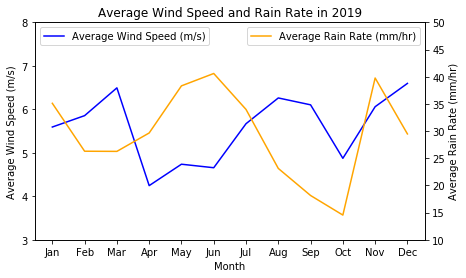

In [137]:
avg=monthly_avg(t,v,p)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(avg[2],avg[0], color='blue', label = 'Average Wind Speed (m/s)')
ax2.plot(avg[2],avg[1], color='orange', label = 'Average Rain Rate (mm/hr)')
ax1.legend(loc='upper left')
plt.legend(loc='upper right')
plt.gcf().set_size_inches(7,4)
ax1.set_ylim([3,8])
ax2.set_ylim([10,50])
plt.xticks(rotation=30)
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Wind Speed (m/s)')
ax2.set_ylabel('Average Rain Rate (mm/hr)')
plt.title('Average Wind Speed and Rain Rate in 2019')
plt.show()